# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DATA_PATH = Path('../data/')

## Options

In [3]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)

In [4]:
n_models = 10
patience = 2
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [5]:
with open(DATA_PATH/'input_pipe.pkl', 'rb') as fin:
    input_pipe = pickle.load(fin)

In [6]:
train_fy = FoldYielder(h5py.File(DATA_PATH/'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 15.251s 


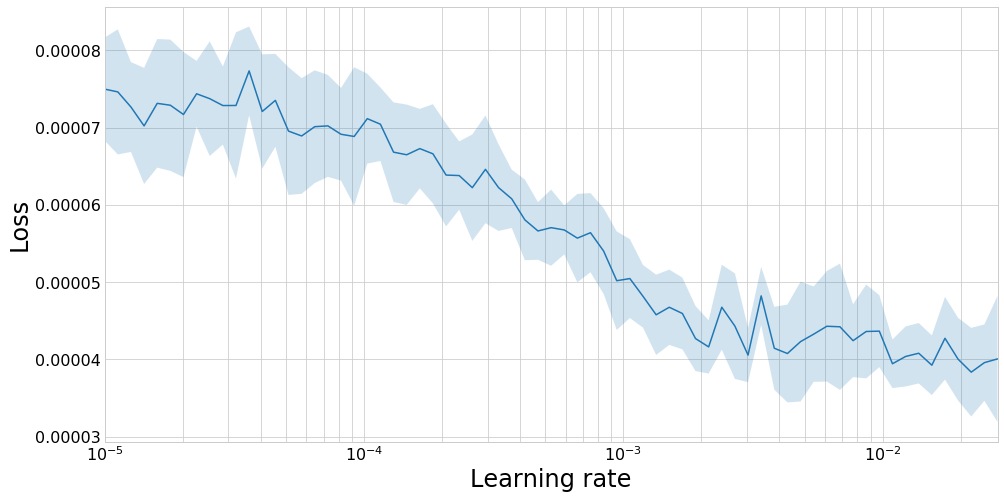

______________________________________



In [7]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [8]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':2, 'reverse':False, 'redux_decay':True}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102296). Check your callbacks.
  % delta_t_median)


1 New best found: 3.63045326504921e-05
2 New best found: 3.487689054867128e-05
3 New best found: 3.4132215745653145e-05
4 New best found: 3.3759503047629045e-05
6 New best found: 3.301980660823177e-05
10 New best found: 3.243407066728809e-05
12 New best found: 3.241900814257014e-05
13 New best found: 3.212808927126989e-05
14 New best found: 3.2091431745828076e-05
23 New best found: 3.195713611288495e-05
26 New best found: 3.1656778403610255e-05
27 New best found: 3.165492788081253e-05
28 New best found: 3.161743617714443e-05
29 New best found: 3.158440459465547e-05
30 New best found: 3.15718532123227e-05
31 New best found: 3.157032174221277e-05
53 New best found: 3.15035745947436e-05
56 New best found: 3.1412902409895734e-05
57 New best found: 3.1378423778360483e-05
58 New best found: 3.136928280297056e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=0.00011866523563337172
137 New best found: 3.136918061804151e-05
139 New best found: 3.1368690858760026e-05
Early s

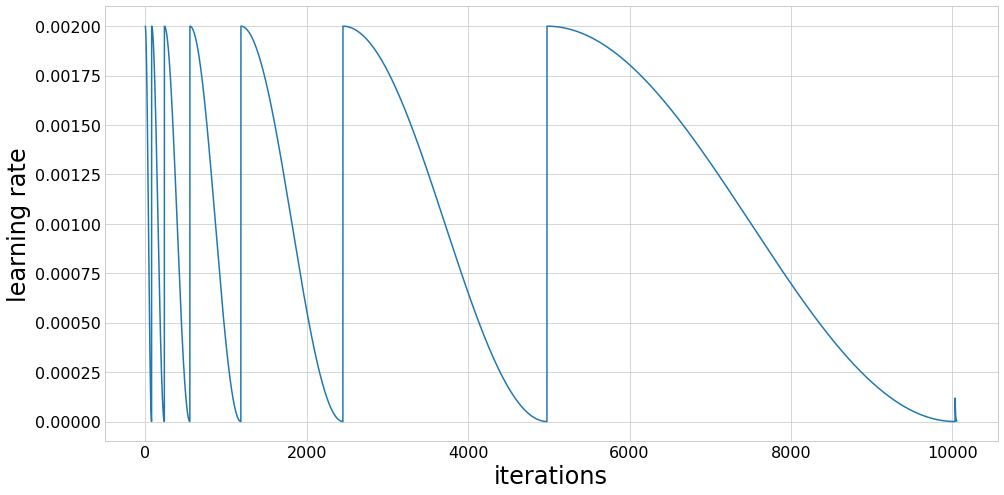

Fold took 116.059s

Training model 2 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.255768). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128243). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7257939363624124e-05
2 New best found: 3.487548768717881e-05
3 New best found: 3.41848315398134e-05
4 New best found: 3.353736595344484e-05
5 New best found: 3.3344058596783016e-05
6 New best found: 3.286812257169689e-05
7 New best found: 3.2710962969401434e-05
10 New best found: 3.2694356892241816e-05
11 New best found: 3.250449345835079e-05
13 New best found: 3.201267306641388e-05
14 New best found: 3.2003610798629047e-05
15 New best found: 3.19818933279563e-05
22 New best found: 3.197157373456682e-05
24 New best found: 3.1742180555584666e-05
26 New best found: 3.172352891110276e-05
28 New best found: 3.163372408032302e-05
29 New best found: 3.1583622841233645e-05
30 New best found: 3.157836985814562e-05
31 New best found: 3.157758201498848e-05
49 New best found: 3.152497191409497e-05
51 New best found: 3.139824503921374e-05
56 New best found: 3.139037690545628e-05
58 New best found: 3.133852211401343e-05
CosineAnneal stalling after 127 epochs, entering redux deca

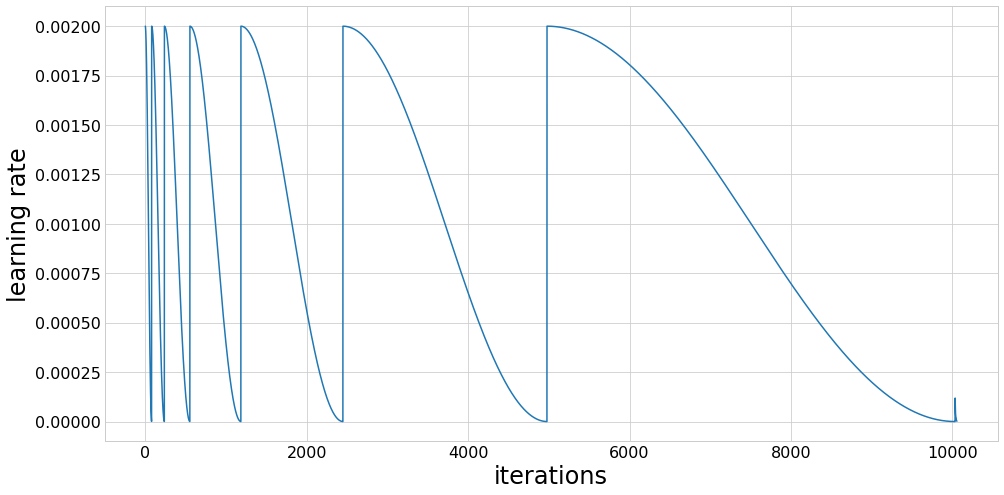

Fold took 116.788s

Training model 3 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.274692). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137677). Check your callbacks.
  % delta_t_median)


1 New best found: 3.812800602490969e-05
2 New best found: 3.550160452597255e-05
3 New best found: 3.480831241675822e-05
4 New best found: 3.444174935672101e-05
5 New best found: 3.382496888739691e-05
6 New best found: 3.3465915627978764e-05
7 New best found: 3.332452990861442e-05
9 New best found: 3.318736576915545e-05
12 New best found: 3.294803347679513e-05
13 New best found: 3.275799287452133e-05
14 New best found: 3.264153507918014e-05
15 New best found: 3.262639058296282e-05
25 New best found: 3.2405394331579846e-05
26 New best found: 3.2327326841892666e-05
27 New best found: 3.2283833227002446e-05
31 New best found: 3.2277388949371255e-05
51 New best found: 3.2264461961984855e-05
53 New best found: 3.216977747583453e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=0.00044546349963341206
133 New best found: 3.21511964641573e-05
135 New best found: 3.2144643549068456e-05
Early stopping after 145 epochs
Score is: {'loss': 3.2144643549068456e-05, 'wAUC': 0.06474

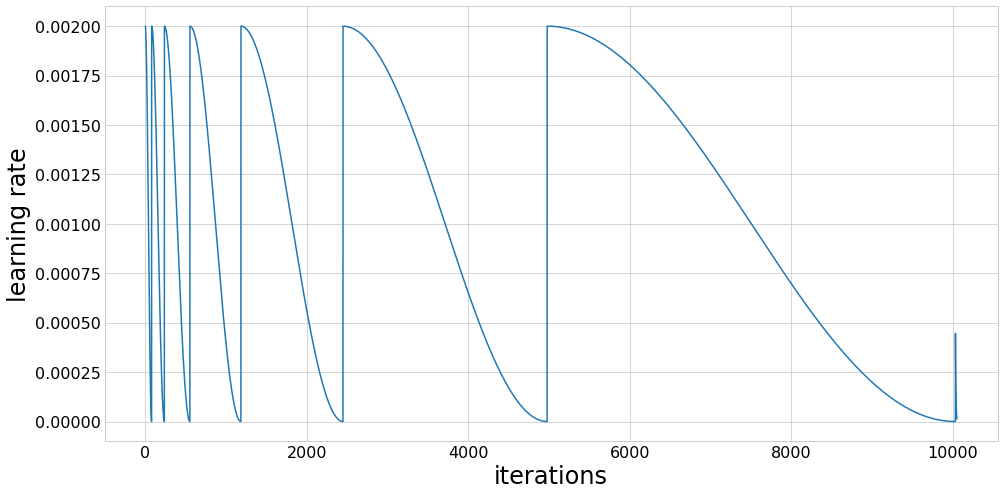

Fold took 116.435s

Training model 4 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.273604). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137175). Check your callbacks.
  % delta_t_median)


1 New best found: 3.756558541062987e-05
2 New best found: 3.516642243630486e-05
3 New best found: 3.458795829792507e-05
5 New best found: 3.3868081914260987e-05
6 New best found: 3.354175673594e-05
7 New best found: 3.337192213512026e-05
12 New best found: 3.2996732043102386e-05
13 New best found: 3.273255940439412e-05
14 New best found: 3.259019479883136e-05
15 New best found: 3.2589611092407724e-05
22 New best found: 3.248181424423819e-05
25 New best found: 3.234640660812147e-05
26 New best found: 3.221148699376499e-05
27 New best found: 3.220671132294228e-05
28 New best found: 3.219680948532187e-05
29 New best found: 3.212059898214647e-05
30 New best found: 3.2108259307278786e-05
31 New best found: 3.2104229133983607e-05
52 New best found: 3.19708285634988e-05
53 New best found: 3.195009339397075e-05
55 New best found: 3.192289115395397e-05
56 New best found: 3.187913443980506e-05
59 New best found: 3.187146847049007e-05
60 New best found: 3.1867045995022635e-05
61 New best found: 3

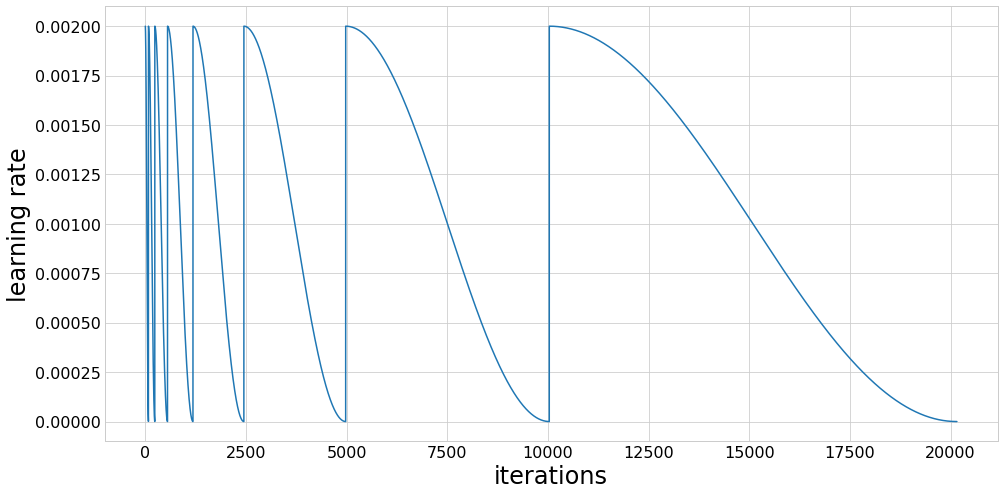

Fold took 215.740s

Training model 5 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.318279). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159545). Check your callbacks.
  % delta_t_median)


1 New best found: 3.818020611224387e-05
2 New best found: 3.550745048123409e-05
3 New best found: 3.5096166371197774e-05
4 New best found: 3.466096831499761e-05
5 New best found: 3.4144179368025285e-05
6 New best found: 3.364968528352437e-05
7 New best found: 3.3564948024484754e-05
11 New best found: 3.3085880956317544e-05
12 New best found: 3.303251048533306e-05
13 New best found: 3.2723612411628006e-05
14 New best found: 3.2603638701466024e-05
15 New best found: 3.259014721486148e-05
23 New best found: 3.2539262523834886e-05
25 New best found: 3.247528755316443e-05
27 New best found: 3.2359810704820454e-05
28 New best found: 3.233699750805875e-05
29 New best found: 3.229712833814794e-05
30 New best found: 3.2265166900632295e-05
50 New best found: 3.2255373999440936e-05
55 New best found: 3.221923218434655e-05
56 New best found: 3.214892559137715e-05
57 New best found: 3.208714793539652e-05
58 New best found: 3.208580855527575e-05
60 New best found: 3.2083024396695084e-05
CosineAnneal

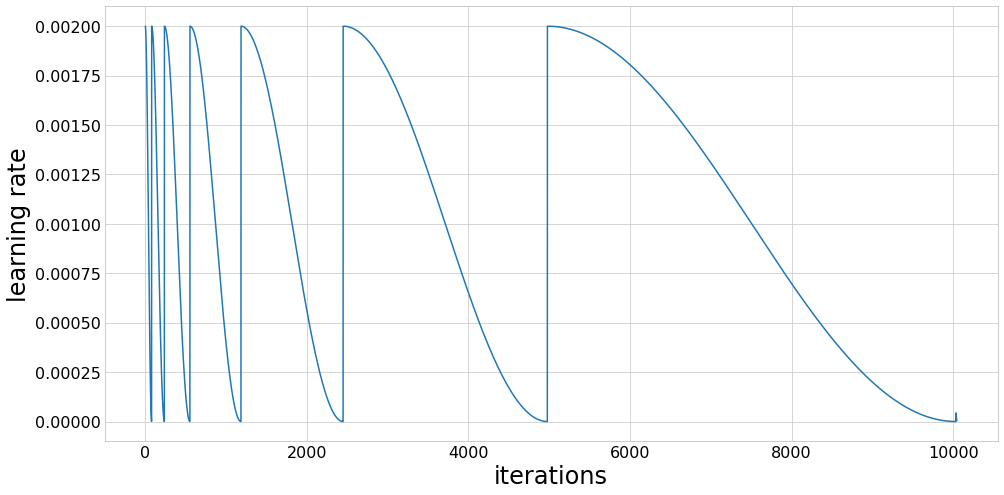

Fold took 117.137s

Training model 6 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.356111). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178395). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7504151564495945e-05
2 New best found: 3.553166179841817e-05
3 New best found: 3.5059624860932674e-05
4 New best found: 3.501055117231357e-05
5 New best found: 3.404045862880945e-05
6 New best found: 3.3863171746047015e-05
7 New best found: 3.378244366893472e-05
11 New best found: 3.346042445808789e-05
12 New best found: 3.3220394279660004e-05
13 New best found: 3.3093680983486015e-05
14 New best found: 3.288721035215473e-05
22 New best found: 3.2818711758281406e-05
23 New best found: 3.276295292124347e-05
26 New best found: 3.249791686464374e-05
28 New best found: 3.249475697944675e-05
29 New best found: 3.246953808996652e-05
49 New best found: 3.239338047490015e-05
50 New best found: 3.2337887654261684e-05
51 New best found: 3.231673104917537e-05
53 New best found: 3.22803843374426e-05
54 New best found: 3.225174170888863e-05
58 New best found: 3.2225075526150564e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=0.00011866523563337172
135 New 

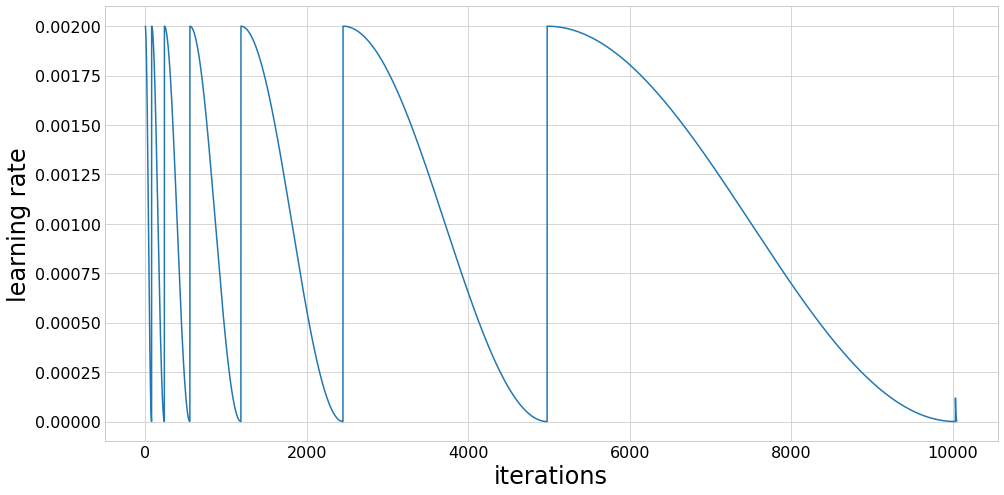

Fold took 125.116s

Training model 7 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.370711). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185737). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7005855348252224e-05
2 New best found: 3.4155675330839584e-05
3 New best found: 3.361005739134271e-05
4 New best found: 3.355839959549485e-05
5 New best found: 3.280722480849363e-05
6 New best found: 3.2433226228749844e-05
7 New best found: 3.22687596839387e-05
11 New best found: 3.2187535287084754e-05
12 New best found: 3.1877449425519444e-05
13 New best found: 3.167776029004017e-05
14 New best found: 3.1531743613595606e-05
23 New best found: 3.140284351538867e-05
25 New best found: 3.1384032852656674e-05
26 New best found: 3.110287968011107e-05
50 New best found: 3.103203907085117e-05
55 New best found: 3.102054194605444e-05
57 New best found: 3.100003951913095e-05
58 New best found: 3.0968051459785786e-05
59 New best found: 3.0909497976244894e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=7.659675222511076e-05
Early stopping after 137 epochs
Score is: {'loss': 3.0909497976244894e-05, 'wAUC': 0.059832817738003974, 'AUC': 0.09190219212723838

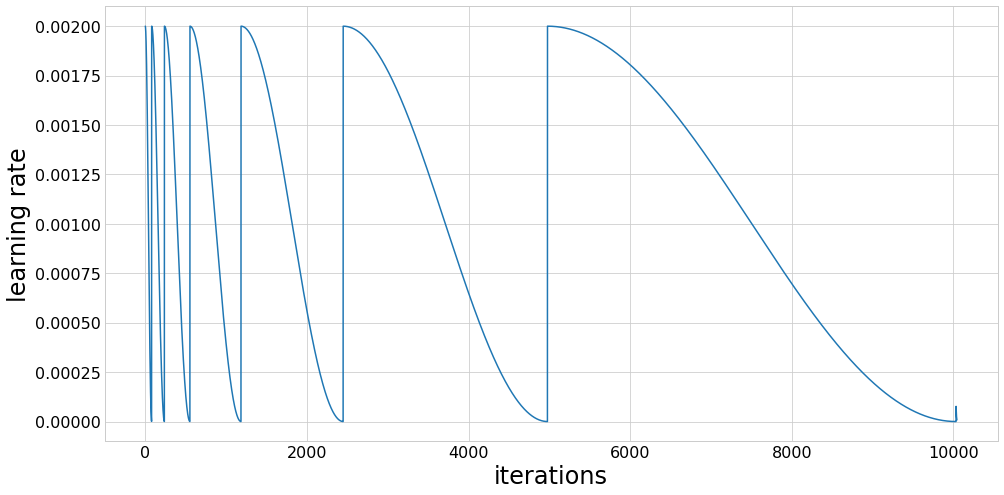

Fold took 121.290s

Training model 8 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.402450). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.201612). Check your callbacks.
  % delta_t_median)


1 New best found: 3.643432129038461e-05
2 New best found: 3.4401890907926335e-05
3 New best found: 3.40483953120132e-05
5 New best found: 3.402486399674681e-05
6 New best found: 3.31106143715713e-05
7 New best found: 3.289375235312066e-05
12 New best found: 3.2584929642278805e-05
13 New best found: 3.224521739416718e-05
15 New best found: 3.219362371530154e-05
24 New best found: 3.210180780282818e-05
25 New best found: 3.202766522064982e-05
27 New best found: 3.200232414308124e-05
28 New best found: 3.186290427685221e-05
29 New best found: 3.183291022174059e-05
49 New best found: 3.173328574601259e-05
54 New best found: 3.1651372788386836e-05
59 New best found: 3.164606872322636e-05
60 New best found: 3.158960891964516e-05
61 New best found: 3.158226416580047e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=1.9457920170504707e-05
128 New best found: 3.1582094596865826e-05
Early stopping after 138 epochs
Score is: {'loss': 3.1582094596865826e-05, 'wAUC': 0.06225145

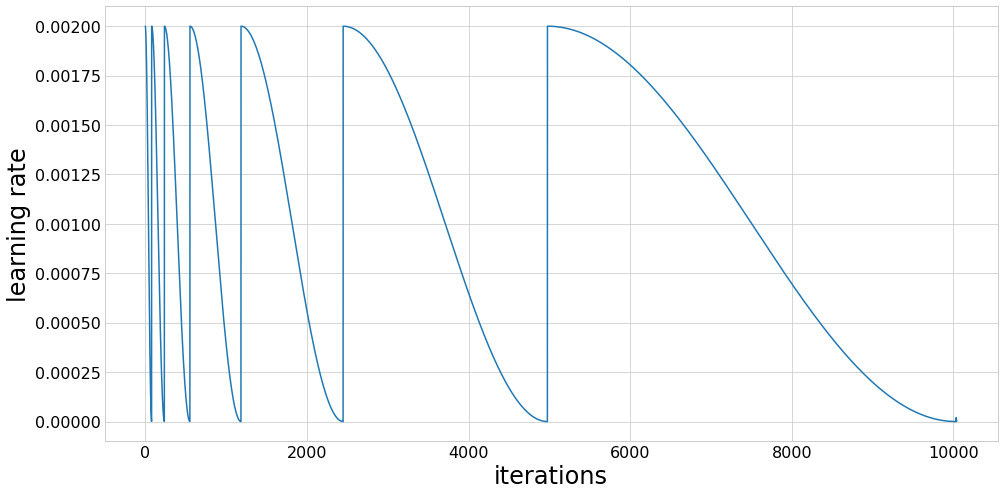

Fold took 125.618s

Training model 9 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.423880). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.212332). Check your callbacks.
  % delta_t_median)


1 New best found: 3.73259882821003e-05
2 New best found: 3.5293239056773016e-05
3 New best found: 3.4598953161912506e-05
5 New best found: 3.397613520937739e-05
6 New best found: 3.353447347326437e-05
7 New best found: 3.322860043554101e-05
11 New best found: 3.294456114817876e-05
12 New best found: 3.277544154843781e-05
13 New best found: 3.253521563019604e-05
14 New best found: 3.23928104393417e-05
26 New best found: 3.2299882512597834e-05
27 New best found: 3.2123898799181915e-05
28 New best found: 3.2116890224278905e-05
29 New best found: 3.208282865962246e-05
30 New best found: 3.205436710413778e-05
52 New best found: 3.20385459024692e-05
54 New best found: 3.193188831792213e-05
57 New best found: 3.186752956535202e-05
58 New best found: 3.184724013262894e-05
59 New best found: 3.180642318475293e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=7.659675222511076e-05
Early stopping after 137 epochs
Score is: {'loss': 3.180642318475293e-05, 'wAUC': 0.06325530946

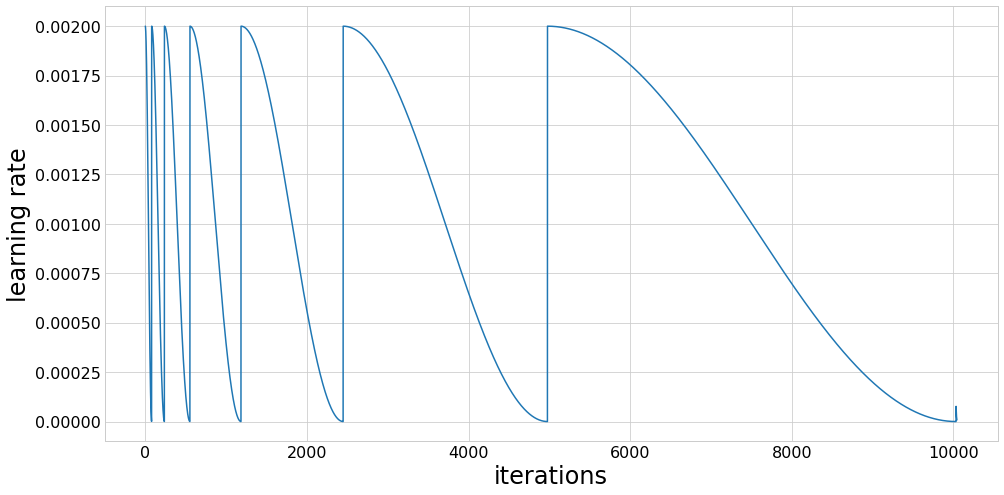

Fold took 126.533s

Training model 10 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.454784). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.227824). Check your callbacks.
  % delta_t_median)


1 New best found: 3.760123269312317e-05
2 New best found: 3.583519644744228e-05
3 New best found: 3.480962335888762e-05
5 New best found: 3.407505554787349e-05
6 New best found: 3.380977957713185e-05
7 New best found: 3.351290108766989e-05
10 New best found: 3.327068318321835e-05
12 New best found: 3.302277526454418e-05
13 New best found: 3.291727460164111e-05
14 New best found: 3.28893475845689e-05
15 New best found: 3.2866270482190885e-05
25 New best found: 3.280812947195955e-05
26 New best found: 3.271304999798303e-05
27 New best found: 3.256115523254266e-05
28 New best found: 3.253631423576735e-05
29 New best found: 3.2498707408376505e-05
30 New best found: 3.246599106787471e-05
31 New best found: 3.246333604911342e-05
48 New best found: 3.245464791252743e-05
51 New best found: 3.240904887206852e-05
53 New best found: 3.2348989267484285e-05
54 New best found: 3.233059973063064e-05
55 New best found: 3.22686806684942e-05
57 New best found: 3.219787129055476e-05
CosineAnneal stalling

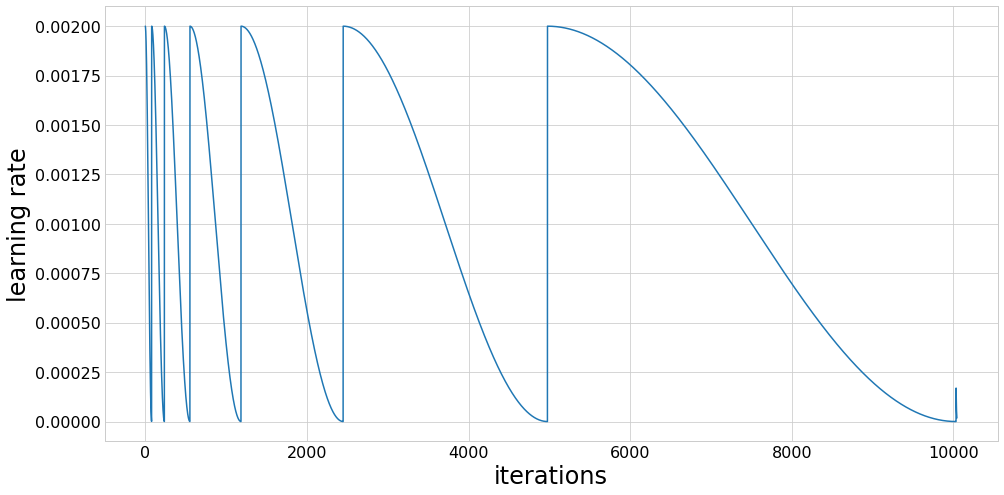

Fold took 130.228s


______________________________________
Training finished
Cross-validation took 1313.893s 


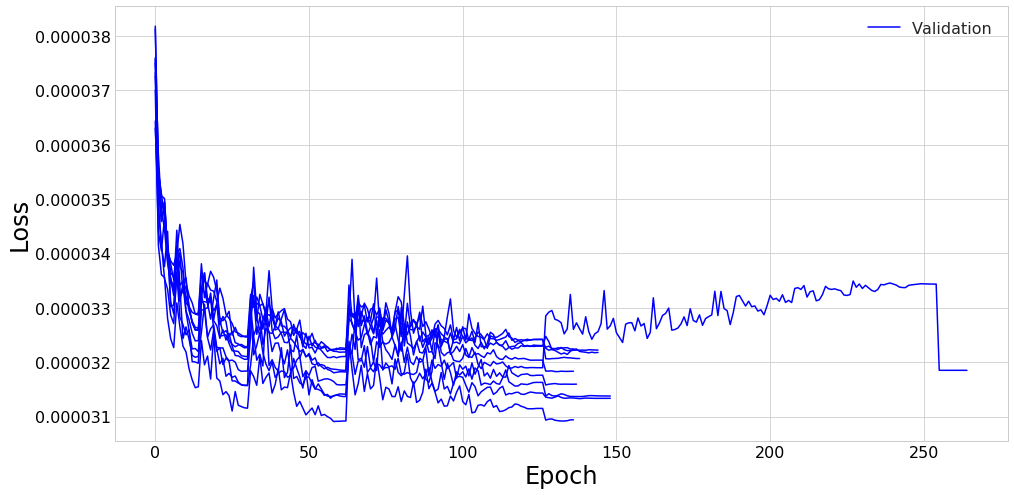

Mean loss = 3.17e-05 +- 1e-07
Mean wAUC = 0.0631 +- 0.0005
Mean AUC = 0.0983 +- 0.0008
Mean AMS = 3.88 +- 0.05
Mean cut = 0.952 +- 0.006
______________________________________



<Figure size 432x288 with 0 Axes>

In [9]:
results, histories = fold_train_model(train_fy, n_models,
                                      model_gen_params=model_gen_params,
                                      train_params=train_params, train_on_weights=True,
                                      use_callbacks=use_callbacks, ams_args=ams_args,
                                      max_epochs=max_epochs, patience=patience,
                                      verbose=1, plots=plots)

The impact of data augmentation is pretty clear. Comparing the training here to that of the the CRL Swish model without augmentation we can see that we effectively gain another LR cycles worth of training epochs before we start overfitting, which allows the networks to reach much lower looses (3.18e-5 c.f. 3.23e-5) and a higher AMSs (3.98 c.f. 3.71)

## Construct ensemble

In [10]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [11]:
ensemble, weights = assemble_ensemble(results, ensemble_size, ensemble_mode, compile_args)

Choosing ensemble by loss
Model 0 is 6 with loss = 3.0909497976244894e-05
Model 1 is 1 with loss = 3.133007551779569e-05
Model 2 is 0 with loss = 3.1368690858760026e-05
Model 3 is 7 with loss = 3.1582094596865826e-05
Model 4 is 8 with loss = 3.180642318475293e-05
Model 5 is 3 with loss = 3.185148487391416e-05
Model 6 is 4 with loss = 3.2060942595396404e-05
Model 7 is 2 with loss = 3.2144643549068456e-05
Model 8 is 9 with loss = 3.219787129055476e-05
Model 9 is 5 with loss = 3.2213404902870975e-05


## Response on validation data

In [12]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [13]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0018482193367555739s per sample

Predicting fold 2 out of 10
Prediction took 0.00035331508107483385s per sample

Predicting fold 3 out of 10
Prediction took 0.00034693370889872315s per sample

Predicting fold 4 out of 10
Prediction took 0.000348456028662622s per sample

Predicting fold 5 out of 10
Prediction took 0.0003512979919090867s per sample

Predicting fold 6 out of 10
Prediction took 0.0003541579678654671s per sample

Predicting fold 7 out of 10
Prediction took 0.0003511386448517442s per sample

Predicting fold 8 out of 10
Prediction took 0.00034869316276162863s per sample

Predicting fold 9 out of 10
Prediction took 0.0003495394317433238s per sample

Predicting fold 10 out of 10
Prediction took 0.0003537778856232762s per sample



In [14]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source)),
                                                           roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source), sample_weight=get_feature('weights', val_fy.source))))

Testing ROC AUC: unweighted 0.9037542999618686, weighted 0.9359409877337355


In [15]:
ams_scan_slow(convert_to_df(val_fy.source), br=10, w_factor=250000/50000)

50000 candidates loaded


(3.9758332549334954, 0.9639452)

In [16]:
%%time
bootstrap_mean_calc_ams(convert_to_df(val_fy.source), br=10, w_factor=250000/50000, N=512)

50000 candidates loaded

Mean calc_ams=4.0+-0.2, at mean cut of 0.97+-0.01
Exact mean cut 0.9654454513220116, corresponds to calc_ams of 3.9248821915131433
CPU times: user 2.45 s, sys: 15.4 s, total: 17.8 s
Wall time: 2min 9s


(4.0, 0.97)

# Test scoring

In [17]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [18]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.000350324363227595s per sample

Predicting fold 2 out of 10
Prediction took 0.0003521829094737768s per sample

Predicting fold 3 out of 10
Prediction took 0.0003510294594378634s per sample

Predicting fold 4 out of 10
Prediction took 0.00035298086144030095s per sample

Predicting fold 5 out of 10
Prediction took 0.0003505742442201484s per sample

Predicting fold 6 out of 10
Prediction took 0.00034857733308930286s per sample

Predicting fold 7 out of 10
Prediction took 0.0003506442126394673s per sample

Predicting fold 8 out of 10
Prediction took 0.00035108081359754907s per sample

Predicting fold 9 out of 10
Prediction took 0.0003521625189110637s per sample

Predicting fold 10 out of 10
Prediction took 0.00035047488917003977s per sample

CPU times: user 3min 27s, sys: 11.5 s, total: 3min 38s
Wall time: 3min 13s


In [19]:
score_test_data(test_fy.source, 0.9654454513220116)

Public:Private AMS: 3.6103492402446107 : 3.6597340796154914


(3.6103492402446107, 3.6597340796154914)

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)